In [1]:
!pip install nltk gensim matplotlib scikit-learn

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [2]:
#import libraries
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import nltk

In [3]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jessicahong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
corpus = [
    "Natural language processing and machine learning are fun.",
    "Deep learning is part of machine learning.",
    "Word embeddings map words to vectors.",
    "Word2Vec is an algorithm for learning word embeddings."
]

In [8]:
#“Take each sentence in the corpus, convert it to lowercase, tokenize it into words, and collect the results into a list.
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
tokenized_corpus

[['natural',
  'language',
  'processing',
  'and',
  'machine',
  'learning',
  'are',
  'fun',
  '.'],
 ['deep', 'learning', 'is', 'part', 'of', 'machine', 'learning', '.'],
 ['word', 'embeddings', 'map', 'words', 'to', 'vectors', '.'],
 ['word2vec',
  'is',
  'an',
  'algorithm',
  'for',
  'learning',
  'word',
  'embeddings',
  '.']]

In [6]:
#word2vec

In [19]:
#Training

In [10]:
model = Word2Vec(
    sentences=tokenized_corpus,  # List of tokenized sentences to train on
    vector_size=100,             # Size of the word vectors (100-dimensional)
    window=5,                   # Context window size (looks at 5 words to the left and right)
    min_count=1,                # Ignores words with total frequency less than 1 (i.e., includes all words)
    workers=2,                  # Number of CPU cores to use for training (parallelization)
    sg=1,                      # 1 means Skip-Gram model, 0 means CBOW model
    epochs=50                  # Number of iterations (epochs) over the entire corpus
)

In [15]:
#Vectorization and Visualization

In [16]:
# Extract vectors
words = list(model.wv.index_to_key)[:10]  # Get top 10 words
vectors = [model.wv[word] for word in words]

In [20]:
print("Top 10 words:", words)

Top 10 words: ['learning', '.', 'machine', 'embeddings', 'word', 'is', 'for', 'deep', 'language', 'processing']


In [29]:
for word, vec in zip(words, vectors):
    print(f"Word: {word}")
    print(f"Vector shape: {vec.shape}")
    print(f"Vector sample values: {vec[:5]}")  # 벡터 앞 5개 값만 출력
    print('-'*30)


Word: learning
Vector shape: (100,)
Vector sample values: [-0.00061214  0.00031468  0.00516957  0.00913923 -0.00928718]
------------------------------
Word: .
Vector shape: (100,)
Vector sample values: [-0.00875573  0.00382548  0.0053185   0.00597684  0.00746369]
------------------------------
Word: machine
Vector shape: (100,)
Vector sample values: [ 1.8217632e-06  3.1680164e-03 -6.7632776e-03 -1.2327639e-03
  7.7066640e-03]
------------------------------
Word: embeddings
Vector shape: (100,)
Vector sample values: [-0.0082973   0.00936183 -0.00016187 -0.00189764  0.00461668]
------------------------------
Word: word
Vector shape: (100,)
Vector sample values: [-0.007185    0.00131862 -0.0071196  -0.00215184  0.00374297]
------------------------------
Word: is
Vector shape: (100,)
Vector sample values: [-0.00883123  0.00227827 -0.00078464 -0.00914893 -0.00940673]
------------------------------
Word: for
Vector shape: (100,)
Vector sample values: [ 0.0080111  -0.00432872 -0.00104189  0.0

In [17]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

In [ ]:
"""
PCA (Principal Component Analysis) is a dimensionality reduction technique.
It takes high-dimensional data and transforms it into a lower-dimensional space, while preserving as much variance (important information) as possible.
"""

In [30]:
"""
Word2Vec represents each word as a high-dimensional vector (e.g., 100 dimensions).
But we can't visually interpret 100-dimensional space.
So we use PCA to reduce the vectors to 2D or 3D, making it easier to visualize the relationships between words.
PCA chooses the most important directions (principal components) — the ones that capture the most variation in the data — and projects the word vectors onto those directions.
"""

"\nWord2Vec represents each word as a high-dimensional vector (e.g., 100 dimensions).\nBut we can't visually interpret 100-dimensional space.\nSo we use PCA to reduce the vectors to 2D or 3D, making it easier to visualize the relationships between words.\nPCA chooses the most important directions (principal components) — the ones that capture the most variation in the data — and projects the word vectors onto those directions.\n"

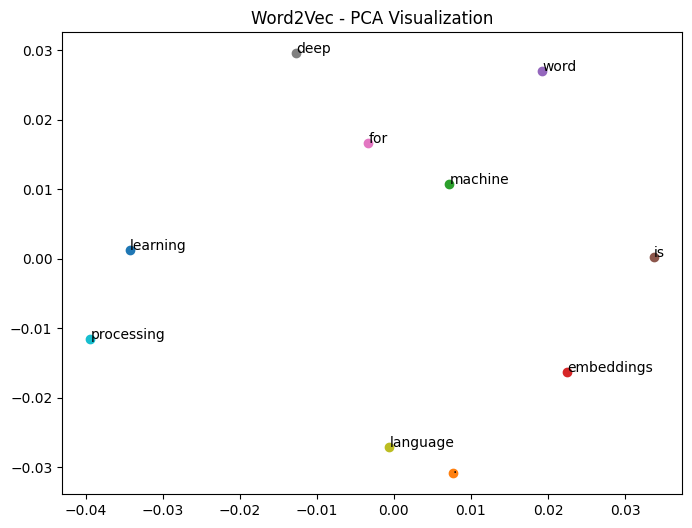

In [18]:
# Visualization
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(result[i, 0], result[i, 1])
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word2Vec - PCA Visualization")
plt.show()

In [31]:
# 모델 저장
model.save("word2vec_model.model")

In [40]:
# Finding similar words

In [41]:
 print("nlp" in model.wv)

False


In [42]:
print(model.wv.index_to_key[:50])  

['learning', '.', 'machine', 'embeddings', 'word', 'is', 'for', 'deep', 'language', 'processing', 'and', 'are', 'fun', 'part', 'algorithm', 'of', 'map', 'words', 'to', 'vectors', 'word2vec', 'an', 'natural']


In [43]:
print(model.wv.index_to_key[:20])

['learning', '.', 'machine', 'embeddings', 'word', 'is', 'for', 'deep', 'language', 'processing', 'and', 'are', 'fun', 'part', 'algorithm', 'of', 'map', 'words', 'to', 'vectors']


In [44]:
model.wv.most_similar("embeddings", topn=5)

[('algorithm', 0.1801537722349167),
 ('is', 0.13471071422100067),
 ('language', 0.07689854502677917),
 ('.', 0.07182400673627853),
 ('natural', 0.045650336891412735)]

In [49]:
#stopwords

In [51]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

cleaned_corpus = [re.sub(r"[^\w\s]", "", sentence.lower()) for sentence in corpus]

tokenized_corpus = [
    [word for word in word_tokenize(sentence) if word not in stop_words]
    for sentence in cleaned_corpus
]

In [45]:
model.wv.most_similar("embeddings", topn=5)

[('algorithm', 0.1801537722349167),
 ('is', 0.13471071422100067),
 ('language', 0.07689854502677917),
 ('.', 0.07182400673627853),
 ('natural', 0.045650336891412735)]

In [52]:
# retraining Word2Vec
"""
i retrained the model due to following reasons:
1. Stopword removal changes the input data by cleaning the corpus and removing common but meaningless words.
2. The original model was trained on the uncleaned data, so it still “remembers” stopwords and their contexts.
3. To reflect the cleaned data, we must retrain the model on the new, cleaned corpus so it can learn better, more meaningful word relationships

"""

model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,
    window=5,
    min_count=1,
    workers=2,
    sg=1,
    epochs=50
)


In [53]:
model.wv.most_similar("embeddings", topn=5)

[('natural', 0.16310808062553406),
 ('language', 0.13980688154697418),
 ('machine', 0.07217658311128616),
 ('map', 0.03621003404259682),
 ('word2vec', 0.013529513962566853)]